# This is the Juypter Notebook containing simulations for Theorem 2 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [52]:
# import functions for simulation and assumption checking
import bivirus
import numpy as np

# for visualization
import networkx as nx
import gravis as gv

In [53]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [54]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=10000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
B1_raw, B2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
B1_thres = np.where(B1_raw < config.threshold, 0, B1_raw)
B2_thres = np.where(B2_raw < config.threshold, 0, B2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
B1 = B1_thres + path_graph_adjacency(config.N, W=config.W/10)
B2 = B2_thres + path_graph_adjacency(config.N, W=config.W/10)
B = [B1, B2]
delta = [
    30 * np.ones(config.N),
    30 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[1.50050961 1.88605606 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.56211491
  1.67562643 0.        ]
 [0.19991683 1.79269898 0.1711156  0.         1.89839503 1.75372476
  0.         0.         1.61642985 1.98947965 0.         0.
  0.         0.         0.         1.91290717 0.         1.82915066
  0.         0.        ]
 [0.         0.15255302 0.         1.81391791 0.         0.
  0.         1.85324135 0.         0.         0.         0.
  0.         1.63046893 1.52575372 1.52771313 0.         0.
  1.50982707 0.        ]
 [0.         1.73389734 1.95187889 0.         0.1062009  1.69746892
  0.         0.         1.89525712 0.         0.         0.
  1.64720756 0.         1.99329845 0.         0.         0.
  0.         1.520101  ]
 [0.         0.         0.         0.05966601 0.         1.88022167
  0.         0.         1.8831194  1.91327549 1.6035491  0.
  0.         

In [55]:
# visualize the infection network in 3D

B1 = nx.from_numpy_array(B[0], create_using=nx.DiGraph) 
B2 = nx.from_numpy_array(B[1], create_using=nx.DiGraph)

# check for strong connectivity
print("Checking strong connectivity of B1 and B2:")
print("B1 is strongly connected:", nx.is_strongly_connected(B1))
print("B2 is strongly connected:", nx.is_strongly_connected(B2))

gv.three(B1, use_edge_size_normalization=True)

Checking strong connectivity of B1 and B2:
B1 is strongly connected: True
B2 is strongly connected: True


In [56]:
gv.three(B2)

In [57]:
# check assumptions of the theorems
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 0.9785954397851361
spectral radius 2 is 0.9791991492504418
Theorem 2 satisfied: True
Theorem 3: 0


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Converged at iteration 462
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375
 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
Converged at iteration 490
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625
 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625 0.5625]
Converged at iteration 506
All assumptions satisfied
x1 is [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

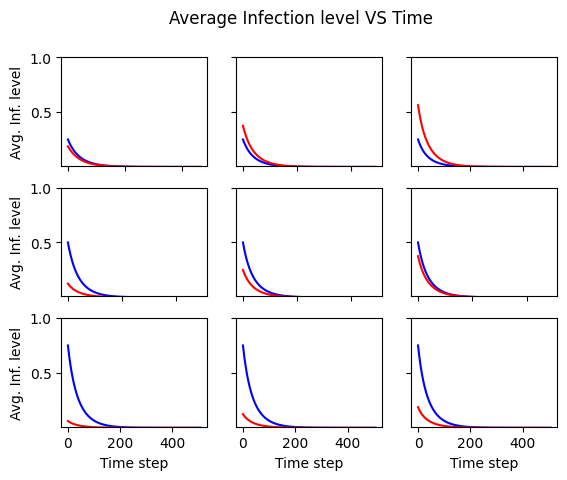

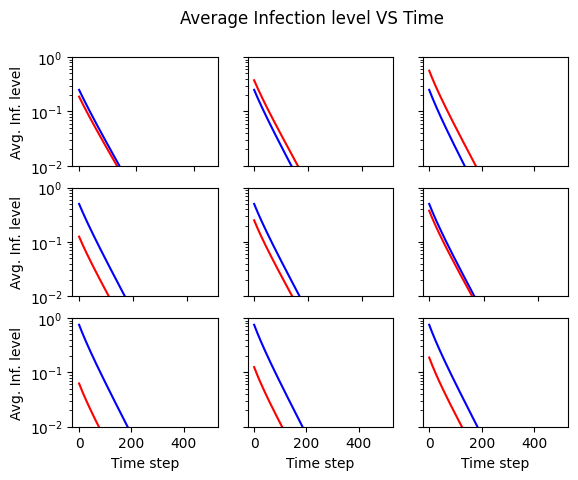

In [58]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)

        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')

All assumptions satisfied
Converged at iteration 494
All assumptions satisfied
Converged at iteration 485
All assumptions satisfied
Converged at iteration 477
All assumptions satisfied
Converged at iteration 487
All assumptions satisfied
Converged at iteration 483
All assumptions satisfied
Converged at iteration 491
All assumptions satisfied
Converged at iteration 480
All assumptions satisfied
Converged at iteration 491
All assumptions satisfied
Converged at iteration 493


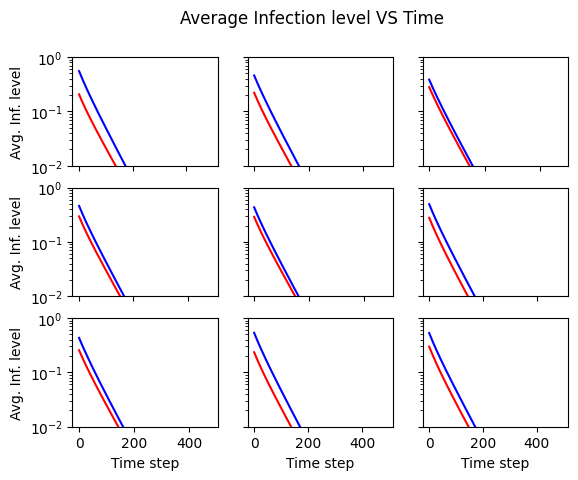

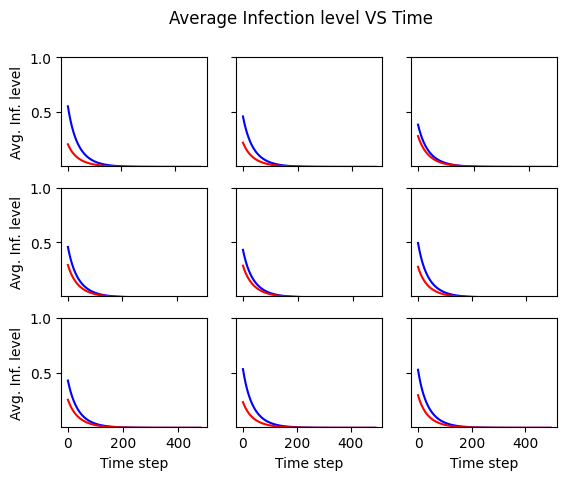

In [59]:
# Completely random initializations
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

Let us examine the equilibrium to check if it is close to the DFE $(0, 0)$

In [60]:
x1_bar = [x1_avg_histories[i][-1] for i in range(len(x1_avg_histories))]
print(x1_bar)
print("average of equilibria of virus 1 across 9 simulations, should be very close to zero(virus 1 dies out):", np.mean(x1_bar))
print("variance of equilibria of virus 1 across 9 simulations: ", np.var(x1_bar), "\n")

x2_bar = [x2_avg_histories[i][-1] for i in range(len(x2_avg_histories))]
print(x2_bar)
print("average of equilibria of virus 2 across 9 simulations, should be very close to zero(virus 2 dies out):", np.mean(x2_bar))
print("variance of equilibria of virus 2 across 9 simulations: ", np.var(x2_bar))

[np.float64(9.392309444973361e-06), np.float64(9.433581552118928e-06), np.float64(9.546745897244741e-06), np.float64(9.530921463433003e-06), np.float64(9.450629199390846e-06), np.float64(9.440555518170572e-06), np.float64(9.420189345700754e-06), np.float64(9.454957984884357e-06), np.float64(9.401791832602183e-06)]
average of equilibria of virus 1 across 9 simulations, should be very close to zero(virus 1 dies out): 9.452409137613193e-06
variance of equilibria of virus 1 across 9 simulations:  2.5311622453553987e-15 

[np.float64(5.5828797441852035e-06), np.float64(6.332838811087903e-06), np.float64(8.665013695827832e-06), np.float64(8.561901162705993e-06), np.float64(9.128319164074445e-06), np.float64(6.277208789832405e-06), np.float64(7.938444323160839e-06), np.float64(5.646531762296191e-06), np.float64(6.58024977570169e-06)]
average of equilibria of virus 2 across 9 simulations, should be very close to zero(virus 2 dies out): 7.190376358763612e-06
variance of equilibria of virus 2 ac